In [1]:
import torch
flag = torch.cuda.is_available()
print(flag)

ngpu= 1
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
print(device)
print(torch.cuda.get_device_name(0))
print(torch.rand(3,3).cuda())

True
cuda:0
GeForce MX150
tensor([[0.8858, 0.9932, 0.6850],
        [0.3089, 0.0770, 0.1366],
        [0.1459, 0.0632, 0.2966]], device='cuda:0')


# 用Numpy還是Torch

In [2]:
import numpy as np

np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(
    '\nnumpy array:', np_data,          # [[0 1 2], [3 4 5]]
    '\ntorch tensor:', torch_data,      #  0  1  2 \n 3  4  5    [torch.LongTensor of size 2x3]
    '\ntensor to array:', tensor2array, # [[0 1 2], [3 4 5]]
)


numpy array: [[0 1 2]
 [3 4 5]] 
torch tensor: tensor([[0, 1, 2],
        [3, 4, 5]], dtype=torch.int32) 
tensor to array: [[0 1 2]
 [3 4 5]]


# Torch中的數學運算

In [3]:
# abs 绝对值计算
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)  # 转换成32位浮点 tensor
print(
    '\nabs',
    '\nnumpy: ', np.abs(data),          # [1 2 1 2]
    '\ntorch: ', torch.abs(tensor)      # [1 2 1 2]
)

# sin   三角函数 sin
print(
    '\nsin',
    '\nnumpy: ', np.sin(data),      # [-0.84147098 -0.90929743  0.84147098  0.90929743]
    '\ntorch: ', torch.sin(tensor)  # [-0.8415 -0.9093  0.8415  0.9093]
)

# mean  均值
print(
    '\nmean',
    '\nnumpy: ', np.mean(data),         # 0.0
    '\ntorch: ', torch.mean(tensor)     # 0.0
)


abs 
numpy:  [1 2 1 2] 
torch:  tensor([1., 2., 1., 2.])

sin 
numpy:  [-0.84147098 -0.90929743  0.84147098  0.90929743] 
torch:  tensor([-0.8415, -0.9093,  0.8415,  0.9093])

mean 
numpy:  0.0 
torch:  tensor(0.)


# matrix multiplication 矩阵点乘

In [4]:

data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data)  # 转换成32位浮点 tensor
# correct method
print(
    '\nmatrix multiplication (matmul)',
    '\nnumpy: ', np.matmul(data, data),     # [[7, 10], [15, 22]]
    '\ntorch: ', torch.mm(tensor, tensor)   # [[7, 10], [15, 22]]
)


matrix multiplication (matmul) 
numpy:  [[ 7 10]
 [15 22]] 
torch:  tensor([[ 7., 10.],
        [15., 22.]])


In [5]:
data = np.array(data).reshape(-1)
tensor = torch.FloatTensor(data)  # 转换成32位浮点 tensor

tensor.dot(tensor)     # torch 会转换成 [1,2,3,4].dot([1,2,3,4) = 30.0

tensor(30.)

# 變量(Variable)

In [6]:
from torch.autograd import Variable # torch 中 Variable 模块

# 先生鸡蛋
tensor = torch.FloatTensor([[1,2],[3,4]])
# 把鸡蛋放到篮子里, requires_grad是参不参与误差反向传播, 要不要计算梯度
variable = Variable(tensor, requires_grad=True)
print(tensor)
print(variable) #獲取Variable裡面的數據

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [7]:
t_out = torch.mean(tensor*tensor)       # x^2
v_out = torch.mean(variable*variable)   # x^2
print(t_out)
print(v_out)    # 7.5

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward1>)


# Variable計算,梯度

In [8]:
# 需要多次backward只需要在第一次反向傳播時候添加一個標識
v_out.backward(retain_graph=True)
print(variable.grad)
print(variable.data)
# 直接print(variable)只會輸出Variable形式的數據,所以我們要轉換一下,將它變成tensor形式.
print(variable.data.numpy())


v_out.backward(retain_graph=True)
print(variable.grad)
print(variable.data)
print(variable.data.numpy())


tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])
tensor([[1., 2.],
        [3., 4.]])
[[1. 2.]
 [3. 4.]]
tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])
[[1. 2.]
 [3. 4.]]


# Torch中的激勵函數

In [10]:
import torch
import torch.nn.functional as F     # 激励函数都在这
from torch.autograd import Variable

# 做一些假数据来观看图像
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x = Variable(x)

In [11]:
x_np = x.data.numpy()   # 换成 numpy array, 出图时用

# 几种常用的 激励函数
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# y_softmax = F.softmax(x)  softmax 比较特殊, 不能直接显示, 不过他是关于概率的, 用于分类

D:\Program\Anaconda3\envs\tensorflow\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
D:\Program\Anaconda3\envs\tensorflow\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


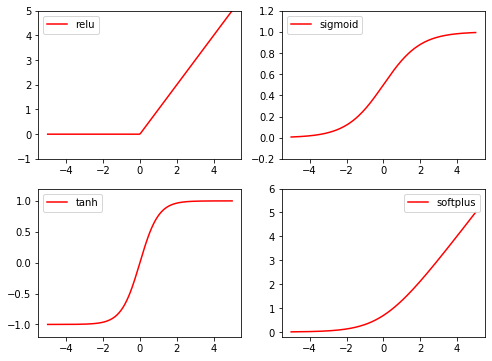

In [12]:
import matplotlib.pyplot as plt  # python 的可视化模块, 我有教程 (https://morvanzhou.github.io/tutorials/data-manipulation/plt/)

plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()